# **Introduction**


Heart disease is a major global health concern, responsible for millions of deaths each year. Early detection of the disease is crucial in preventing its progression and improving patient outcomes. Machine learning models can predict the likelihood of heart disease in individuals, aiding in early detection and prevention. Accurate identification of individuals at risk can lead to timely interventions, potentially saving lives. As such, predictive models hold great promise in the fight against heart disease.

# **Importing libraries & Reading Data**


## Importing libraries

In [108]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif


from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from statistics import mean, stdev
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

import warnings
# warnings.filterwarnings("error")

my_palette = sns.color_palette(["#C62828","#1565C0","#8A897C","#59D2FE","#D7B49E"])
sns.set_palette(my_palette)

## Read the data

In [109]:
df = pd.read_csv("Heart_Disease.csv")

In [110]:
# look at the first 5 rows of the data
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No


In [111]:
# split data into categorical and continuous datasets for future preprocessing
categorical_columns = ['Gender','work_type','smoking_status','Heart Disease']
categorical_df =df[categorical_columns]

non_categorical_df = df.loc[:, ~df.columns.isin(categorical_columns)]

continuous_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression','Thallium']
continuous_df = df[continuous_columns]

columns = df.columns

In [112]:
# check the shape of the data set
df.shape

(270, 17)

# **Data Preprocessing**


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

## **Checking Nulls**

**Approaches to Treat Null Values**
1. **Drop Nulls**

One approach to handling null values is to simply drop them from the dataset. This can be done using the `.dropna()` method in Pandas. However, it is important to consider that this approach will result in a loss of valuable data.

2. **Replace with Median or Mean**

Another approach is to replace null values with the median or mean of the respective column. This can be done using the .fillna() method in Pandas. The median is often preferred over the mean if the data contains outliers.

3. **Replace with Machine Learning Models**

A more advanced approach is to use machine learning models to predict the missing values. This approach can be particularly useful when dealing with a significant number of missing values. However, it may be computationally intensive if there are large number of nulls.

In [114]:
#check the number of nulls in each column and the information of the data
df.isnull().sum()

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64

In [115]:
# calculate the percentage of null values in columns
print("Percentage of Null Values in Columns")
(df.isna().mean() * 100).round(1).astype(str) + '%'

Percentage of Null Values in Columns


id                         0.0%
Age                        2.2%
Gender                     2.2%
Chest pain type            0.0%
BP                         0.0%
Cholesterol                0.0%
FBS over 120               0.0%
EKG results                0.0%
Max HR                     0.0%
Exercise angina            0.0%
ST depression              0.0%
Slope of ST                0.0%
Number of vessels fluro    0.0%
Thallium                   0.0%
work_type                  3.3%
smoking_status             2.2%
Heart Disease              0.0%
dtype: object

In [116]:
data_loss = 100-(df.dropna().shape[0]/df.shape[0]*100)
print(round(data_loss, 1) ,"% of lost data if we drop nulls.")

9.6 % of lost data if we drop nulls.


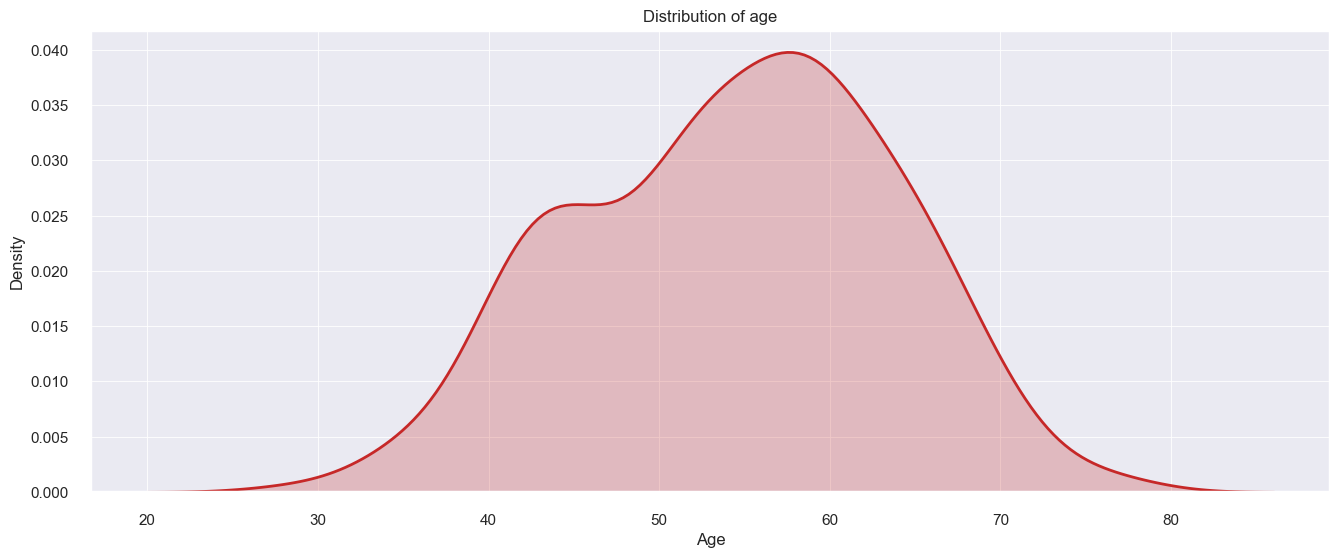

In [117]:
plt.figure(figsize = (16, 6))
plt.title("Distribution of age")
sns.kdeplot(data = df['Age'], fill = True)
plt.show()

The plot showed that the age is normally distributed so it's preferable to use the mean to replace null values in age column

**Conclusion of treating with null:**

Since Dropping the rows with null values would result in a loss of **9.6%** of the data, which is too much. Additionally, the data is too small to afford losing any more data. Replacing the null values with the median or mean could introduce bias into the predictions. This is because the median or mean may not be representative of the actual values. so the best approach is to replace with machine learning models for the numeric column (Age) and with mode in categorical columns (Gender, work type, smoking status)

In [118]:
# find the indices of all rows in the `df` DataFrame where the `Age` column is null.
null_indices = df['Age'].index[df['Age'].isnull()].tolist()
null_indices

[58, 102, 158, 190, 226, 263]

In [119]:
df.iloc[null_indices]

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
58,59,NaN,Male,4,174,249,0,0,143,1,0.0,2,0,3,Self-employed,never smoked,Yes
102,103,NaN,Male,4,130,269,0,0,163,0,0.0,1,0,3,Private,formerly smoked,No
158,159,NaN,Female,1,120,193,0,2,162,0,1.9,2,0,7,Self-employed,formerly smoked,No
190,191,NaN,Female,4,140,239,0,0,160,0,1.2,1,0,3,Private,NaN,No
226,227,NaN,Male,3,130,263,0,0,97,0,1.2,2,1,7,Private,never smoked,Yes
263,264,NaN,Female,2,130,266,0,0,171,0,0.6,1,0,3,Private,never smoked,No


In [120]:
# Create a new DataFrame with only non-null values to train the model
train_data = non_categorical_df.dropna()

# Split the data into features and target variables
X_train = train_data.drop('Age', axis=1)
y_train = train_data['Age']

# Train a Random Forest regressor to predict the missing values
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Use the trained model to predict the missing values
mask = non_categorical_df['Age'].isnull()
X_test = non_categorical_df.loc[mask].drop('Age', axis=1)
y_pred = rf.predict(X_test)
df.loc[mask, 'Age'] = y_pred

In [121]:
df.iloc[null_indices]

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
58,59,62.28,Male,4,174,249,0,0,143,1,0.0,2,0,3,Self-employed,never smoked,Yes
102,103,51.32,Male,4,130,269,0,0,163,0,0.0,1,0,3,Private,formerly smoked,No
158,159,49.37,Female,1,120,193,0,2,162,0,1.9,2,0,7,Self-employed,formerly smoked,No
190,191,57.33,Female,4,140,239,0,0,160,0,1.2,1,0,3,Private,NaN,No
226,227,60.42,Male,3,130,263,0,0,97,0,1.2,2,1,7,Private,never smoked,Yes
263,264,48.70,Female,2,130,266,0,0,171,0,0.6,1,0,3,Private,never smoked,No


In [122]:
# #replacing nulls in age column by mean
# mean_value=df['Age'].mean()
# df['Age'].fillna(value=mean_value, inplace=True)

In [123]:
#replacing nulls in Gender, work_type, smoking_status columns by their mode because they are categorical data
df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=True)
df['work_type'].fillna(value=df['work_type'].mode()[0], inplace=True)
df['smoking_status'].fillna(value=df['smoking_status'].mode()[0], inplace=True)

## **Checking data types**

In [124]:
# check the data type of each column
df.dtypes

id                           int64
Age                        float64
Gender                      object
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
work_type                   object
smoking_status              object
Heart Disease               object
dtype: object

* Age should be **int** instead of **float64**.

In [125]:
# Change column type to int for column: 'Age'
df = df.astype({'Age': 'int64'})

## **Encoding data**

In [126]:
encoded_df = df.copy()
#changing data type of Gender, work_type, smoking_status and Heart Disease columns by encoding
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.

for col in categorical_columns:
    encoded_df[col]= label_encoder.fit_transform(df[col])
# df["Heart Disease"]= np.where(df["Heart Disease"]=="No",0,1)
encoded_df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70,0,4,130,322,0,2,109,0,2.4,2,3,3,2,1,1
1,2,67,1,3,115,564,0,2,160,0,1.6,2,0,7,3,2,0
2,3,57,0,2,124,261,0,0,141,0,0.3,1,0,7,2,2,1
3,4,64,0,4,128,263,0,0,105,1,0.2,2,1,7,2,3,0
4,5,74,1,2,120,269,0,2,121,1,0.2,1,1,3,3,2,0


## **Checking outliers**

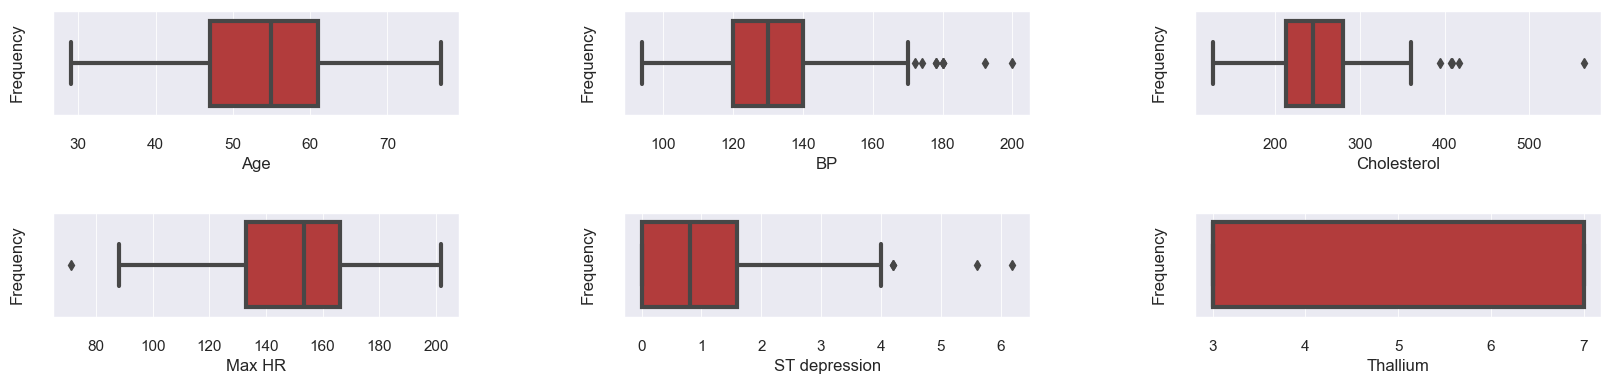

In [127]:
nrows = 2
ncols = 3

# choosing continuous data


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 4))
axes = axes.flatten()

for i, col in enumerate(continuous_df):
    sns.boxplot(data=continuous_df, x=col, ax=axes[i])
    axes[i].set_ylabel('Frequency')
for i in range(len(continuous_df.columns), nrows * ncols):
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.9)
plt.show()


In [128]:
cols = list(df.drop(categorical_columns, axis=1).columns)

for col in cols:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')

Number of outliers in id: 0
Number of outliers in Age: 0
Number of outliers in Chest pain type: 20
Number of outliers in BP: 9
Number of outliers in Cholesterol: 5
Number of outliers in FBS over 120: 40
Number of outliers in EKG results: 0
Number of outliers in Max HR: 1
Number of outliers in Exercise angina: 0
Number of outliers in ST depression: 4
Number of outliers in Slope of ST: 0
Number of outliers in Number of vessels fluro: 19
Number of outliers in Thallium: 0


there are columns such as **BP, Cholesterol, Max HR and ST depression** that contain outliers and should be treated. But other columns like **FBS over 120** that is a categorical column.

In [129]:
outliers_columns = ['BP','Cholesterol','Max HR','ST depression']

def remove_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col.clip(lower=lower_bound, upper=upper_bound)

# Apply the remove_outliers function to each column in the outliers_columns list
df[outliers_columns] = df[outliers_columns].apply(remove_outliers)

In [130]:
# # function to replace outliers with the max value possible without missing the data 🙂
# outliers_columns = ['BP','Cholesterol','Max HR','ST depression']

# def outliers(dataset,col):
#   Q1 = dataset[col].quantile(0.25)
#   Q3 = dataset[col].quantile(0.75)
#   IQR = Q3-Q1
#   lower_bound = Q1-1.5*IQR
#   upper_bound = Q3+1.5*IQR

#   for i in range(len(dataset)):
#       if dataset[col].iloc[i] > upper_bound:
#           dataset[col].iloc[i] = upper_bound
#       if dataset[col].iloc[i] < lower_bound:
#           dataset[col].iloc[i] = lower_bound
# #replacing the outliers using the function (On trying we saw that replacing the outliers of these features gives us the best accuracy for us)
# for col in outliers_columns:
#     outliers(df,col)

# **Feature selection**

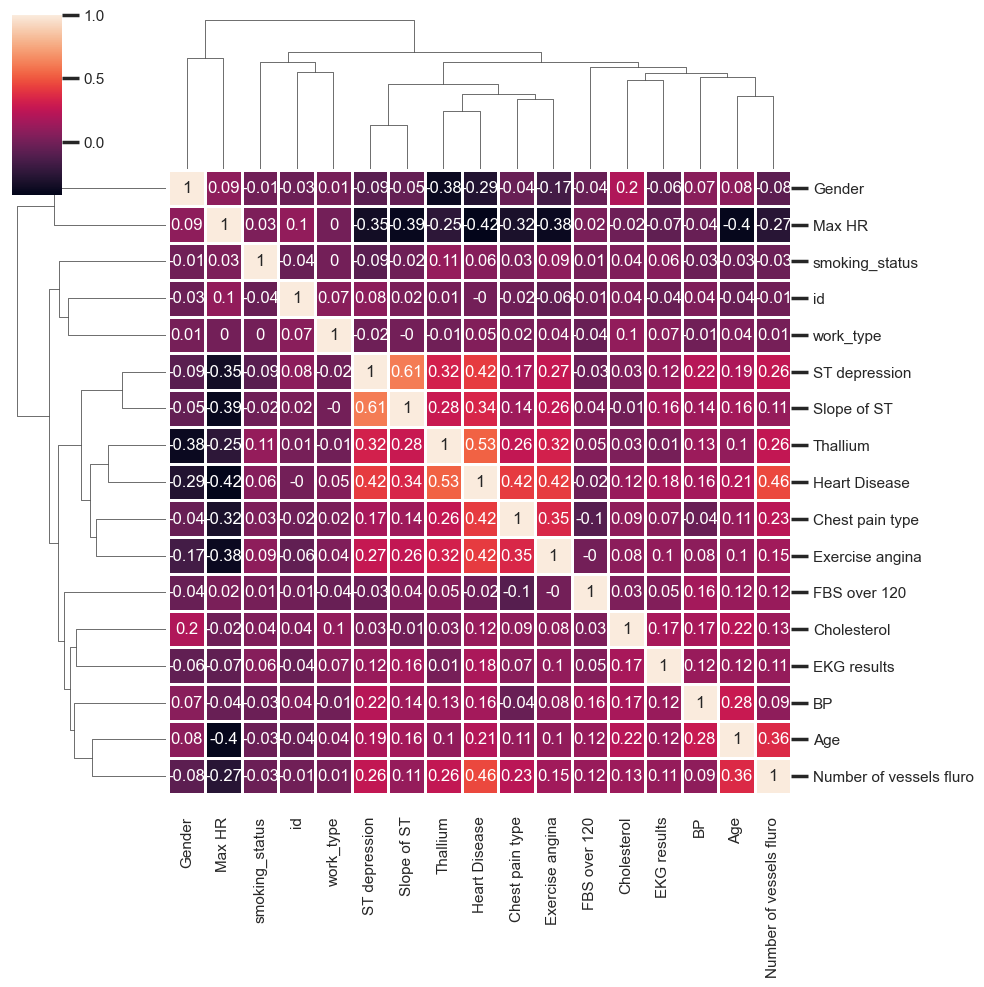

In [131]:
sns.clustermap(encoded_df.corr().round(2),lw = 1, annot = True,)
plt.show()

Correlation map could shorten the way of the feature selection but it's not reliable because it only depends on linear correlation between features

In [132]:
# splitting x and y for feature selection
X = encoded_df.iloc[:,1:-1]
y = encoded_df.iloc[:,-1]


### 1. **VarianceThreshold**

* Summary: This method removes features whose variance doesn't meet a certain threshold. It is used for continuous variables and works by removing the features with low variance, assuming they have little impact on the target variable.
* Pros: It's a fast and simple way to remove low variance features that are unlikely to be important predictors.
* Cons: It may remove features that are important but have low variance, and it does not consider the relationship between features and the target variable.


In [133]:

var_thres = VarianceThreshold(threshold=10)
var_thres.fit(continuous_df)

# Get the support of the VarianceThreshold object.
support = var_thres.get_support()

# Create a list of constant columns.
constant_columns = [column for column in continuous_df.columns if column not in continuous_df.columns[support]]

print("The following columns were selected:", constant_columns)


The following columns were selected: ['ST depression', 'Thallium']



### 2. **SelectKBest with chi-squared test**

* Summary: This method selects the top k features based on the chi-squared statistical test, which measures the dependence between the feature and the target variable.
* Pros: It's a simple and efficient way to select features that are likely to have a significant relationship with the target variable.
* Cons: It only works with discrete data, and assumes that the relationship between the feature and the target variable is linear.


In [134]:
# instantiate the selector with chi-squared
selector = SelectKBest(chi2, k=1)

# fit the selector on the categorical columns and transform it
X_train_selected = selector.fit_transform(X.loc[:,['Gender','work_type','smoking_status']], y)

# get the names of the selected features
selected_features = X.loc[:,['Gender','work_type','smoking_status']].columns[selector.get_support(indices=True)]

# print the names of the selected features
print("Selected features:", selected_features)


Selected features: Index(['Gender'], dtype='object')



### 3. **Lasso regularization**

* Summary: This method applies L1 regularization to the linear regression model, which penalizes the absolute size of the coefficients and sets some of them to zero. The features with non-zero coefficients are selected as the most important.
* Pros: It can handle both continuous and categorical data, and it can capture complex non-linear relationships between features and the target variable.
* Cons: The selection of features depends on the choice of the regularization parameter, and it may not work well when the number of features is much larger than the number of samples.


In [135]:
# instantiate the Lasso model with alpha value
lasso_model = Lasso(alpha=0.3)

# fit the Lasso model on the training set
lasso_model.fit(X, y)

# print the coefficients of the features
print("Feature coefficients:", lasso_model.coef_)

# get the names of the selected features
selected_features = X.columns[lasso_model.coef_ != 0]

# print the names of the selected features
print("Selected features:", selected_features)


Feature coefficients: [ 0.         -0.          0.          0.00219248  0.00079758 -0.
  0.         -0.00773788  0.          0.          0.          0.
  0.028045    0.          0.        ]
Selected features: Index(['BP', 'Cholesterol', 'Max HR', 'Thallium'], dtype='object')



### 4. **SelectKBest with mutual information**

* Summary: This method selects the top k features based on the mutual information between the feature and the target variable, which measures the amount of information shared between them.
* Pros: It can handle both continuous and categorical data, and it captures non-linear relationships between features and the target variable.
* Cons: It may not work well with high-dimensional data, and it assumes that the relationship between the feature and the target variable is monotonic.


In [136]:
# instantiate the selector with mutual information
selector = SelectKBest(mutual_info_classif, k=3)

# fit the selector on the training set and transform it
X_train_selected = selector.fit_transform(X, y)

# get the names of the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# print the names of the selected features
print("Selected features:", selected_features)

Selected features: Index(['Chest pain type', 'Number of vessels fluro', 'Thallium'], dtype='object')



### 5. **SelectKBest with ANOVA F-test**

* Summary: This method selects the top k features based on the ANOVA F-test, which measures the variance between the groups and the variance within the groups.
* Pros: It works well with discrete data and is robust to outliers.
* Cons: It assumes that the relationship between the feature and the target variable is linear, and it may not work well with imbalanced classes.

In [137]:
# instantiate the selector with ANOVA F-test
selector = SelectKBest(f_classif, k=3)

# fit the selector on the training set and transform it
X_train_selected = selector.fit_transform(X, y)

# get the names of the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# print the names of the selected features
print("Selected features:", selected_features)


Selected features: Index(['Exercise angina', 'Number of vessels fluro', 'Thallium'], dtype='object')


# conclusion should be placed here

In [138]:
# remove columns for analysis and predictions
df.drop(columns = ['Exercise angina','Number of vessels fluro','Thallium','id'], inplace=True)
X = encoded_df.drop(['Exercise angina', 'Number of vessels fluro', 'Thallium','id'], axis=1)

# **Data Analysis**

## ***Numeric Analyis***

We need to divide the dataset into numeric and categorical datasets


In [227]:
# Create a new column with age ranges
df['Age Range'] = np.where(df['Age'] >= 55, 'Age > 55', 'Age < 55')

In [140]:
df['Heart Disease']=df['Heart Disease'].replace({'Yes': 1, 'No': 0})
df.head()

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,ST depression,Slope of ST,work_type,smoking_status,Heart Disease,Age Range
0,70,Female,4,130,322.0,0,2,109.0,2.4,2,Private,formerly smoked,1,>55
1,67,Male,3,115,380.5,0,2,160.0,1.6,2,Self-employed,never smoked,0,>55
2,57,Female,2,124,261.0,0,0,141.0,0.3,1,Private,never smoked,1,>55
3,64,Female,4,128,263.0,0,0,105.0,0.2,2,Private,smokes,0,>55
4,74,Male,2,120,269.0,0,2,121.0,0.2,1,Self-employed,never smoked,0,>55


In [141]:
non_categorical_df.describe().round(2)

,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.00,264.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00,270.00
mean,135.50,54.42,3.17,131.34,249.66,0.15,1.02,149.68,0.33,1.05,1.59,0.67,4.70
std,78.09,9.18,0.95,17.86,51.69,0.36,1.00,23.17,0.47,1.15,0.61,0.94,1.94
min,1.00,29.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00
25%,68.25,47.00,3.00,120.00,213.00,0.00,0.00,133.00,0.00,0.00,1.00,0.00,3.00
50%,135.50,55.00,3.00,130.00,245.00,0.00,2.00,153.50,0.00,0.80,2.00,0.00,3.00
75%,202.75,61.00,4.00,140.00,280.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00
max,270.00,77.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00


In [142]:
categorical_df.describe()

,Gender,work_type,smoking_status,Heart Disease
count,264,261,264,270
unique,2,5,4,2
top,Female,Private,never smoked,No
freq,179,159,96,150


In [143]:
Negative_df = df.loc[df["Heart Disease"]==0,:]
Positive_df = df.loc[df["Heart Disease"]==1,:]

```
Negative = doesn't have heart disease
Positive = doesn'have heart disease
```

In [144]:
Negative_df.describe().round(2)

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,ST depression,Slope of ST,Heart Disease
count,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.00,150.0
mean,52.69,2.82,128.73,242.66,0.15,0.86,158.33,0.62,1.40,0.0
std,9.52,0.93,16.08,47.46,0.36,0.99,19.28,0.80,0.59,0.0
min,29.00,1.00,94.00,126.00,0.00,0.00,96.00,0.00,1.00,0.0
25%,45.00,2.00,120.00,209.00,0.00,0.00,148.25,0.00,1.00,0.0
50%,52.00,3.00,130.00,236.00,0.00,0.00,161.00,0.20,1.00,0.0
75%,59.00,3.75,140.00,268.75,0.00,2.00,172.00,1.18,2.00,0.0
max,76.00,4.00,170.00,380.50,1.00,2.00,202.00,4.00,3.00,0.0


In [150]:
Positive_df.describe().round(2)

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,ST depression,Slope of ST,Heart Disease
count,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.00,120.0
mean,56.60,3.62,133.74,256.01,0.14,1.23,138.96,1.55,1.82,1.0
std,8.12,0.78,17.32,46.62,0.35,0.97,22.85,1.19,0.56,0.0
min,35.00,1.00,100.00,149.00,0.00,0.00,83.50,0.00,1.00,1.0
25%,52.00,4.00,120.00,227.25,0.00,0.00,124.75,0.60,1.00,1.0
50%,58.00,4.00,130.00,255.50,0.00,2.00,141.50,1.40,2.00,1.0
75%,62.00,4.00,145.00,286.50,0.00,2.00,157.25,2.42,2.00,1.0
max,77.00,4.00,170.00,380.50,1.00,2.00,195.00,4.00,3.00,1.0


In [151]:
df.groupby('Gender').mean()

C:\Users\Jonat\AppData\Local\Temp\ipykernel_16540\3774296011.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,ST depression,Slope of ST,Heart Disease
Gender,,,,,,,,,,
Female,53.908108,3.200000,130.275676,242.643243,0.156757,1.059459,148.408108,1.111892,1.605405,0.540541
Male,55.552941,3.117647,132.447059,261.535294,0.129412,0.941176,152.588235,0.865882,1.541176,0.235294


In [152]:
df.pivot_table(index='Age Range', aggfunc='mean',columns = 'Chest pain type')["Heart Disease"].style.bar(subset=[1],vmin=0,vmax=1,color="#D65F5F")\
    .bar(subset=[2],vmin=0,vmax=1,color="#D84535").bar(subset=[3],vmin=0,vmax=1,color="#BF2717").bar(subset=[4],vmin=0,vmax=1,color="#981508")

C:\Users\Jonat\AppData\Local\Temp\ipykernel_16540\478253572.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



Chest pain type,1,2,3,4
Age Range,,,,
<55,0.125000,0.074074,0.108696,0.627451
>55,0.333333,0.333333,0.363636,0.756410


**Important conclusions for numeric analysis:**
1. Numeric columns: 
    * standard deviation of age is only 10 which is a bit low, minimum age is 29 so children values should be removed or replaced from work type.
2. Negative vs Positive heart disease values:
    * Positive values are more likely to have higher mean or medians in almost all positive heart disease columns except only **Max Heart rate** which will be discussed in divariate analysis.
    * standard deviation of negative heart disease columns are a bit higher in some columns than positive columns, which means that positive heart disease targets low ranges in most features and can be predictable.
    * Minimum age of negative is 29 and 35 in positive heart disease, whether heart disease are common for high ages or these are outliers
    * BP has very similar value ranges in both
3. Male vs Female:
    * Male and female values are mostly commmon in many features except for heart disease where 54% percentage of female got heart disease while 23% for male
4. Chest pain type with age ranges for heart disease:
    * It's so obvious that by increasing type of chest pain and age becomes >55
    * There is 75% in >55 with chest pain type 4 has heart disease which is high percentage and with 62% for <55 that means that type 4 is very risky and likely to have heart disease

## ***Graphic Analyis***

In [153]:
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
colors=["#80002D","#4C70F6","#8A897C","#59D2FE","#D7B49E"]
colors2=["#80002D","#0B3FEA"]

## **Univariate Analysis**

First we should take a fast view over the columns

|Column              |Description|
|--------------------|-----------|
|Age                 |The person's age in years.|
|Gender              |The person's gender.|
|Chest pain type     |The type of chest pain experienced by the person.|
|BP                  |Blood Pressure in mmHg.|
|Cholesterol         |The person's cholesterol level in mg/dl.|
|FBS over 120        |Whether the person's fasting blood sugar level is greater than 120 mg/dl (1 if true, 0 if false).|
|EKG results         |The results of the person's electrocardiogram.|
|Max HR              |The person's maximum heart rate achieved during exercise.|
|ST depression       |The ST depression induced by exercise relative to rest.|
|Slope of ST         |The slope of the ST segment on the EKG.|
|work_type           |The person's type of work (e.g., Private, Self-employed, Govt_job).|
|smoking_status      |The person's smoking status (e.g., never smoked, formerly smoked, Unknown, smokes).|
|Heart Disease       |Whether the person has heart disease (1 if true, 0 if false).|


In [154]:
my_palette = sns.color_palette(["#C62828","#1565C0","#8A897C","#59D2FE","#D7B49E"])

sns.set_palette(my_palette)

In [156]:
df.iloc[:,:-2]

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,ST depression,Slope of ST,work_type,smoking_status
0,70,Female,4,130,322.0,0,2,109.0,2.4,2,Private,formerly smoked
1,67,Male,3,115,380.5,0,2,160.0,1.6,2,Self-employed,never smoked
2,57,Female,2,124,261.0,0,0,141.0,0.3,1,Private,never smoked
3,64,Female,4,128,263.0,0,0,105.0,0.2,2,Private,smokes
4,74,Male,2,120,269.0,0,2,121.0,0.2,1,Self-employed,never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,Female,3,170,199.0,1,0,162.0,0.5,1,Private,smokes
266,44,Female,2,120,263.0,0,0,173.0,0.0,1,Private,never smoked
267,56,Male,2,140,294.0,0,2,153.0,1.3,2,Govt_job,smokes
268,57,Female,4,140,192.0,0,0,148.0,0.4,2,Self-employed,smokes


In [157]:
df.columns

Index(['Age', 'Gender', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'ST depression', 'Slope of ST', 'work_type',
       'smoking_status', 'Heart Disease', 'Age Range'],
      dtype='object')

In [274]:
# Define the number of rows and columns for the subplots
n_rows = 3
n_cols = 4

# Create a list of column names
cols = df.iloc[:,:-2].columns.tolist()

# Create a figure with subplots using Plotly
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=cols)

# Iterate over the columns of the dataframe and create a histogram for each one
for i, col in enumerate(cols):
    n_row = (i // n_cols) + 1  # Calculate the row index for the current subplot
    n_col = (i % n_cols) + 1   # Calculate the column index for the current subplot
    fig.add_trace(go.Histogram(x=df[col]), row=n_row, col=n_col)  # Create a histogram for the current column

# Set the layout of the figure
fig.update_layout(height=800, width=1300, title_text="Histograms of each column in the dataframe", template = 'plotly_dark')

# Show the figure
fig.show()

In [160]:
def histplot(x, color = "Heart Disease",height=500, width=600,font_size=13,color_sequence=["#C62828", "#1565C0"], text_auto=True, bins=40):
    fig = px.histogram(df, x=x, color="Heart Disease", color_discrete_sequence=color_sequence, text_auto=text_auto, nbins=bins)
    fig.update_layout(barmode='group', title=x, font=dict(size=font_size), legend=dict(title='Heart Disease Status'),height=height, width=width, template = 'plotly_dark')
    
    fig.update_traces(name='No', selector=dict(name='0'))
    fig.update_traces(name='Yes', selector=dict(name='1'))
    fig.show()

In [161]:
labels = ['No', 'Yes']
values = df['Heart Disease'].value_counts().values.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=["#1565C0","#C62828"], line=dict(color='#000000', width=2)))
fig.update_layout(title='Heart Disease', font=dict(size=20), legend=dict(title=''),height=400, width=400, template = 'plotly_dark')
fig.show()


## **Divariate Analysis**

In [303]:
df.describe()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,ST depression,Slope of ST,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.425926,3.174074,130.959259,248.590741,0.148148,1.022222,149.724074,1.034444,1.585185,0.444444
std,9.116760,0.950090,16.798450,47.468245,0.355906,0.997891,23.019928,1.091484,0.614390,0.497827
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,83.500000,0.000000,1.000000,0.000000
25%,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,1.000000,0.000000
50%,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.800000,2.000000,0.000000
75%,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.600000,2.000000,1.000000
max,77.000000,4.000000,170.000000,380.500000,1.000000,2.000000,202.000000,4.000000,3.000000,1.000000


In [302]:
df.head()

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,ST depression,Slope of ST,work_type,smoking_status,Heart Disease,Age Range
0,70,Female,4,130,322.0,0,2,109.0,2.4,2,Private,formerly smoked,1,Age > 55
1,67,Male,3,115,380.5,0,2,160.0,1.6,2,Self-employed,never smoked,0,Age > 55
2,57,Female,2,124,261.0,0,0,141.0,0.3,1,Private,never smoked,1,Age > 55
3,64,Female,4,128,263.0,0,0,105.0,0.2,2,Private,smokes,0,Age > 55
4,74,Male,2,120,269.0,0,2,121.0,0.2,1,Self-employed,never smoked,0,Age > 55


In [288]:
fig = px.scatter_matrix(continuous_df.iloc[:,:-1],
    title="Scatter",) # remove underscore
fig.update_layout(height=800, width=1300, title_text="Scatter matrix", template = 'plotly_dark')
fig.update_traces(diagonal_visible=False)
fig.show()

### Age

In [162]:
histplot("Age", width=1200, text_auto=False)

### Gender

In [163]:
histplot("Gender",bins=2)

In [164]:
histplot("Chest pain type", bins=4)

In [165]:
histplot("BP", width=1200, text_auto=False)

In [166]:
histplot("Cholesterol", width=1200, text_auto=False)

In [167]:
histplot("FBS over 120",bins=2)

EKG (Electrocardiogram) is a test that measures electrical activity of the heart. Abnormal results can indicate heart disease.

In [168]:
histplot("EKG results",bins=3)

Exercise-induced angina is chest pain or discomfort that occurs during physical activity in individuals with heart disease. It is caused by reduced blood flow to the heart muscle due to narrowed or blocked arteries.

ST depression is a type of abnormal ECG finding where the ST segment of the heart's electrical activity appears lowered. It is often associated with coronary artery disease and other heart conditions.

In [169]:
histplot("ST depression", width=1200, text_auto=False,bins=12)

Slope of ST refers to the upward or downward movement of the ST segment on an electrocardiogram. A deviation from the normal slope could indicate the presence of heart disease.

In [170]:
histplot("Slope of ST",bins=3)

The number of vessels visible under a fluro imaging test may indicate the presence of heart disease. The more vessels that are blocked or narrowed, the higher the risk of heart disease.

Thallium is a radioactive substance used in medical imaging tests to evaluate blood flow to the heart muscle. Thallium stress tests can help diagnose coronary artery disease, a type of heart disease caused by narrowed or blocked arteries

Smoking is a significant risk factor for heart disease. It damages blood vessels, increases plaque buildup, and reduces blood flow to the heart, leading to an increased risk of heart disease, heart attack, and stroke.

In [171]:
histplot("smoking_status",bins=4)

The relationship between work type and heart disease is complex and can depend on various factors such as physical activity, stress, and environmental exposure. Jobs involving high physical activity may reduce the risk of heart disease, while sedentary jobs and those with high stress or environmental toxins may increase the risk.

In [172]:
histplot("work_type",bins=5)

## **Multivariate Analysis**

In [197]:
df.head()

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,ST depression,Slope of ST,work_type,smoking_status,Heart Disease,Age Range
0,70,Female,4,130,322.0,0,2,109.0,2.4,2,Private,formerly smoked,1,>55
1,67,Male,3,115,380.5,0,2,160.0,1.6,2,Self-employed,never smoked,0,>55
2,57,Female,2,124,261.0,0,0,141.0,0.3,1,Private,never smoked,1,>55
3,64,Female,4,128,263.0,0,0,105.0,0.2,2,Private,smokes,0,>55
4,74,Male,2,120,269.0,0,2,121.0,0.2,1,Self-employed,never smoked,0,>55


In [292]:
import plotly.express as px

# Assign colors based on 'Heart Disease' values
color_values = ['blue' if val == 0 else 'red' for val in df['Heart Disease']]

fig = px.scatter_matrix(continuous_df.iloc[:, :-1],
    title="Scatter matrix", color=color_values, symbol=df['Heart Disease'].map({0: 'No', 1: 'Yes'}))
fig.update_layout(height=800, width=1300, title_text="Scatter matrix", template='plotly_dark')
fig.update_traces(diagonal_visible=False)
fig.show()


In [201]:
df.head()

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,ST depression,Slope of ST,work_type,smoking_status,Heart Disease,Age Range
0,70,Female,4,130,322.0,0,2,109.0,2.4,2,Private,formerly smoked,1,>55
1,67,Male,3,115,380.5,0,2,160.0,1.6,2,Self-employed,never smoked,0,>55
2,57,Female,2,124,261.0,0,0,141.0,0.3,1,Private,never smoked,1,>55
3,64,Female,4,128,263.0,0,0,105.0,0.2,2,Private,smokes,0,>55
4,74,Male,2,120,269.0,0,2,121.0,0.2,1,Self-employed,never smoked,0,>55


In [296]:
import plotly.express as px

fig = px.sunburst(
    df,
    path=['Gender', 'work_type'],
    values='Heart Disease',
    color='Gender',
    color_discrete_map={'Male':'#1565C0', 'Female':'#C62828'}
)

fig.update_layout(title='Gender vs. Work Type - Sunburst Plot')
fig.show()


In [297]:
import plotly.express as px

fig = px.sunburst(
    df,
    path=['Gender', 'smoking_status'],
    values='Heart Disease',
    color='Gender',
    color_discrete_map={'Male':'#1565C0', 'Female':'#C62828'}
)

fig.update_layout(title='Gender vs. Smoking Status - Sunburst Plot')
fig.show()


In [298]:
import plotly.express as px

fig = px.sunburst(
    df,
    path=['Gender', 'Age Range'],
    values='Heart Disease',
    color='Gender',
    color_discrete_map={'Male':'#1565C0', 'Female':'#C62828'}
)

fig.update_layout(title='Gender vs. Age Range - Sunburst Plot')
fig.show()


In [300]:
import plotly.express as px

fig = px.sunburst(
    df,
    path=['Age Range', 'smoking_status'],
    values='Heart Disease',
    color='Age Range',
    color_discrete_map={'Age > 55': '#FF6384', 'Age < 55': '#36A2EB'}
)

fig.update_layout(title='Age Range vs. Smoking Status - Sunburst Plot')
fig.show()


In [301]:
import plotly.express as px

fig = px.sunburst(
    df,
    path=['Age Range', 'work_type'],
    values='Heart Disease',
    color='Age Range',
    color_discrete_map={'Age > 55': '#FF6384', 'Age < 55': '#36A2EB'}
)

fig.update_layout(title='Age Range vs. Work Type - Sunburst Plot')
fig.show()


In [174]:
df_male=df.loc[df["Gender"]=="Male",:]
df_female=df.loc[df["Gender"]=="Female",:]

Age_disease_male=pd.crosstab(df_male["Age"],df_male["Heart Disease"])*100/85
Age_disease_female=pd.crosstab(df_female["Age"],df_female["Heart Disease"])*100/185

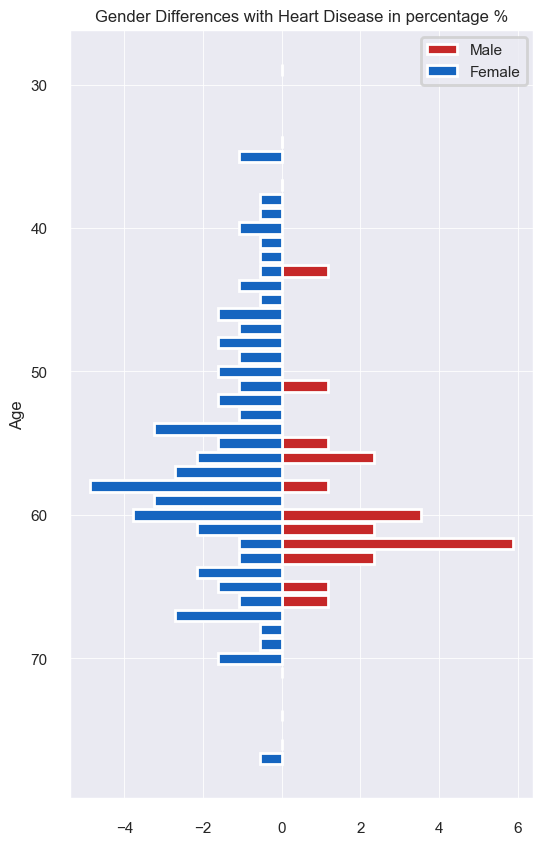

In [175]:
fig = plt.figure(figsize=(6, 10))

plt.barh(Age_disease_male.index, Age_disease_male.iloc[:,1], color='#C62828',label='Male')
plt.barh(Age_disease_female.index, Age_disease_female.iloc[:,1] * -1, color='#1565C0',label='Female')
plt.title("Gender Differences with Heart Disease in percentage %")
plt.ylabel("Age")
plt.gca().invert_yaxis()
plt.legend()
plt.show()

Smoking can increase "bad" cholesterol (LDL) and decrease "good" cholesterol (HDL), which can lead to the buildup of plaque in the arteries and increase the risk of heart disease.

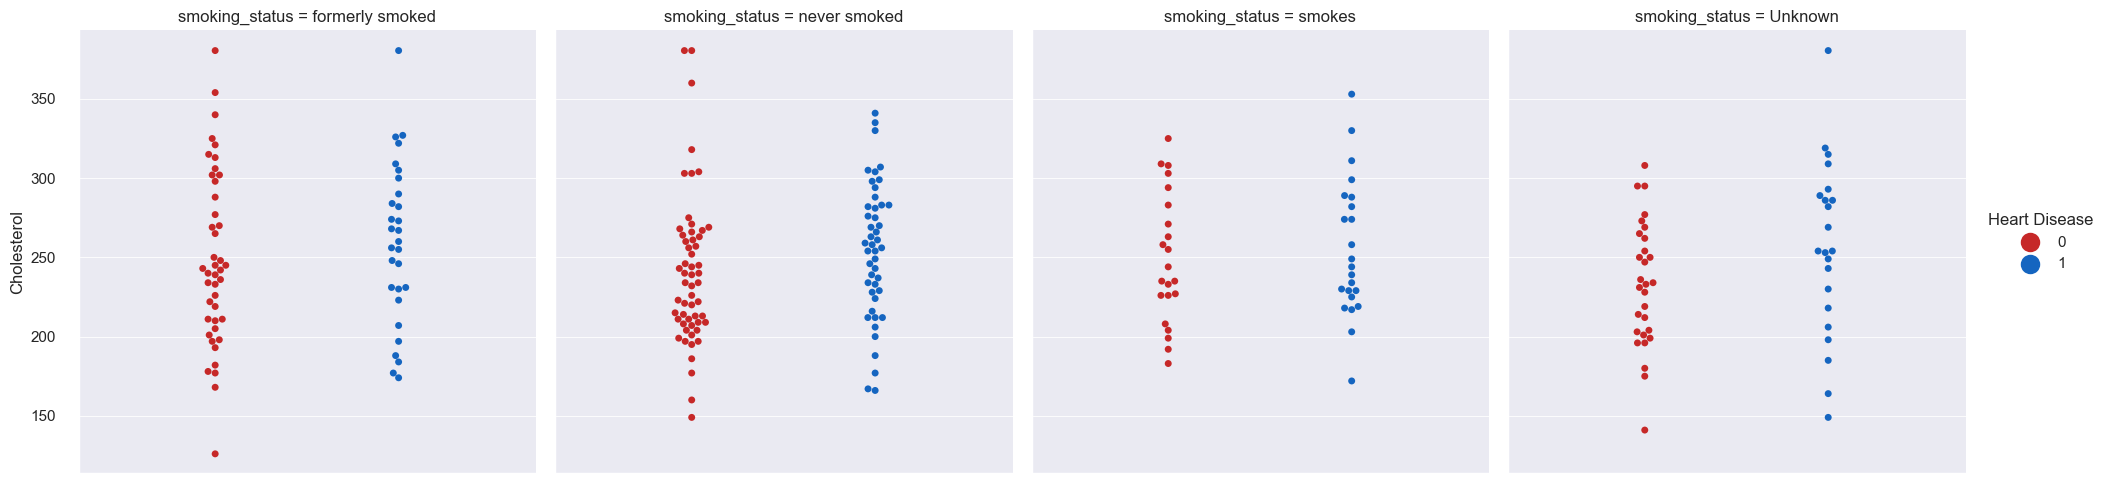

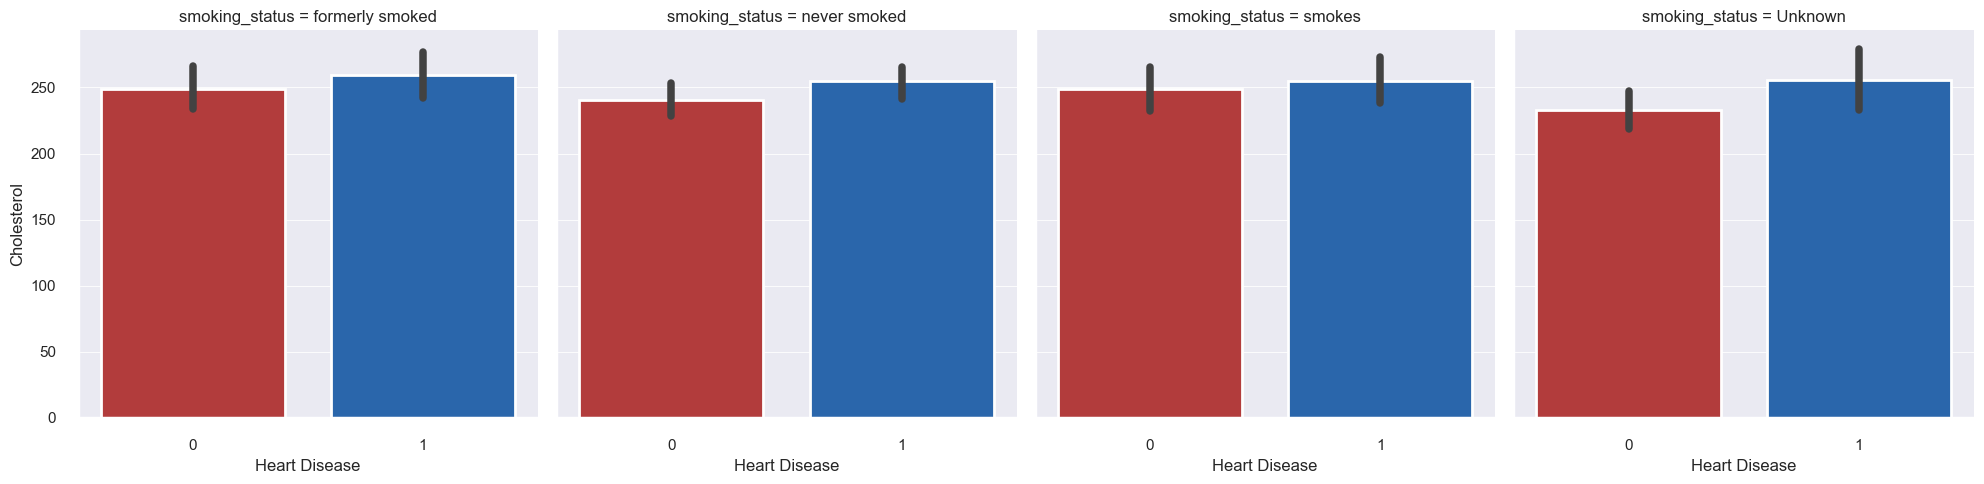

In [176]:
sns.catplot(data = df, y="Cholesterol",hue="Heart Disease",col="smoking_status",kind="swarm", dodge=True)
sns.catplot(data = df, y="Cholesterol",x="Heart Disease",col="smoking_status",kind="bar")

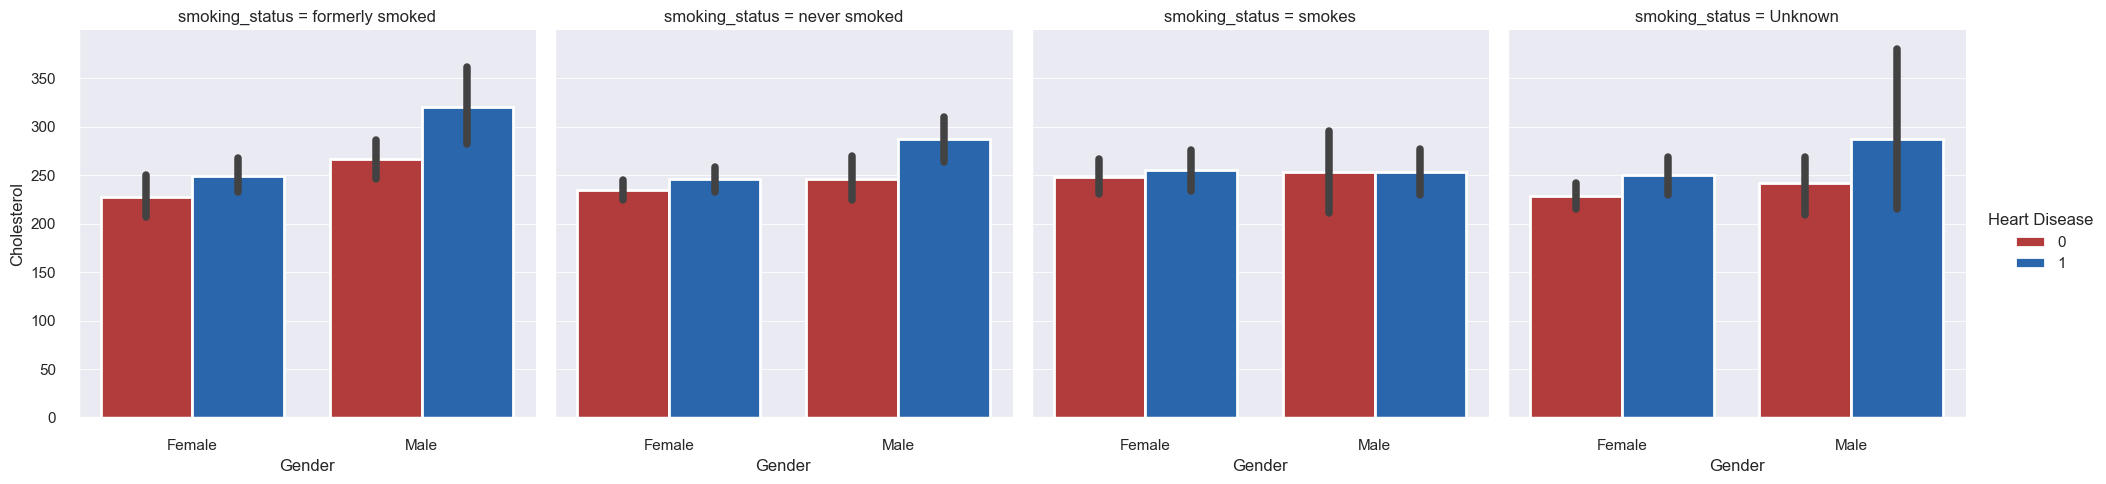

In [177]:
sns.catplot(data = df, x="Gender",hue="Heart Disease",col="smoking_status",kind="bar", y="Cholesterol")

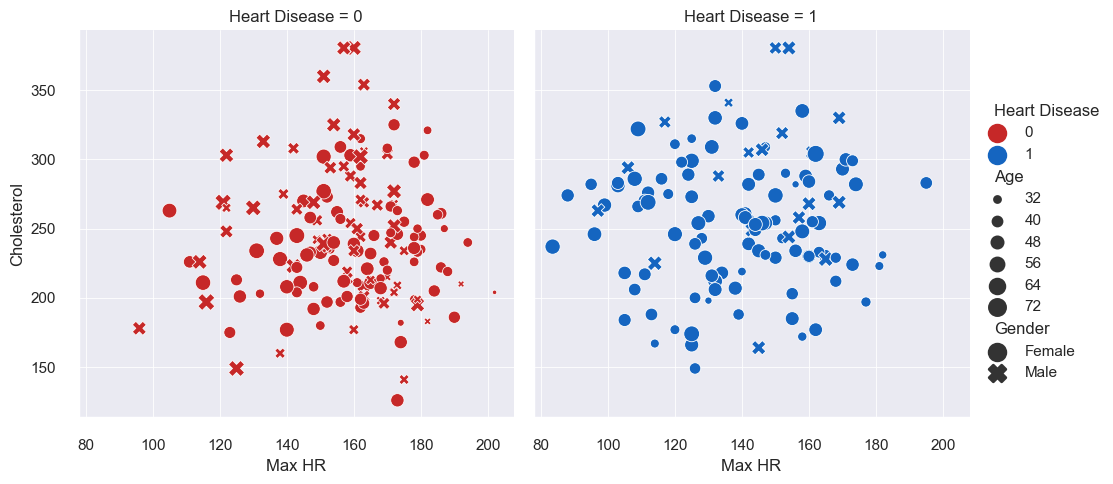

In [178]:
sns.relplot(data=df, x="Max HR",y='Cholesterol',size='Age',col='Heart Disease',hue='Heart Disease', sizes=(10, 150),style='Gender')

# **Predictions**

In [179]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [180]:
# df.drop(columns="Age Range",inplace=True)

In [181]:
df.head()

,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,ST depression,Slope of ST,work_type,smoking_status,Heart Disease,Age Range
0,70,Female,4,130,322.0,0,2,109.0,2.4,2,Private,formerly smoked,1,>55
1,67,Male,3,115,380.5,0,2,160.0,1.6,2,Self-employed,never smoked,0,>55
2,57,Female,2,124,261.0,0,0,141.0,0.3,1,Private,never smoked,1,>55
3,64,Female,4,128,263.0,0,0,105.0,0.2,2,Private,smokes,0,>55
4,74,Male,2,120,269.0,0,2,121.0,0.2,1,Self-employed,never smoked,0,>55


In [182]:
#splitting the data to x(features) and y(column we want to predict) 
X=encoded_df.drop(['Heart Disease'] ,axis=1)
y=encoded_df['Heart Disease']

In [183]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000],
    'n_jobs': [1,2,3]
}

print("First, using standardization:")
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_train)
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")
print("Minimum accuracy:", min(grid_search.cv_results_['mean_test_score']) * 100, "%")
print("Overall accuracy:", grid_search.cv_results_['mean_test_score'].mean() * 100, "%")
print("Standard Deviation is:", grid_search.cv_results_['std_test_score'])


print("\nSecond, using normalization:")
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X_train)
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")
print("Minimum accuracy:", min(grid_search.cv_results_['mean_test_score']) * 100, "%")
print("Overall accuracy:", grid_search.cv_results_['mean_test_score'].mean() * 100, "%")
print("Standard Deviation is:", grid_search.cv_results_['std_test_score'])
y_pred = grid_search.predict(X_test)

First, using standardization:
Best parameters: {'C': 0.1, 'max_iter': 1000, 'n_jobs': 1}
Best accuracy score: 1.0
Minimum accuracy: 97.01219512195122 %
Overall accuracy: 99.2530487804878 %
Standard Deviation is: [0.02452099 0.02452099 0.02452099 0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]

Second, using normalization:
Best parameters: {'C': 0.1, 'max_iter': 1000, 'n_jobs': 1}
Best accuracy score: 1.0
Minimum accuracy: 98.52380952380952 %
Overall accuracy: 99.63095238095238 %
Standard Deviation is: [0.0317623 0.0317623 0.0317623 0.        0.        0.        0.
 0.        0.        0.        0.        0.       ]


c:\Users\Jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



Text(0.5, 51.41666666666664, 'Predicted label')

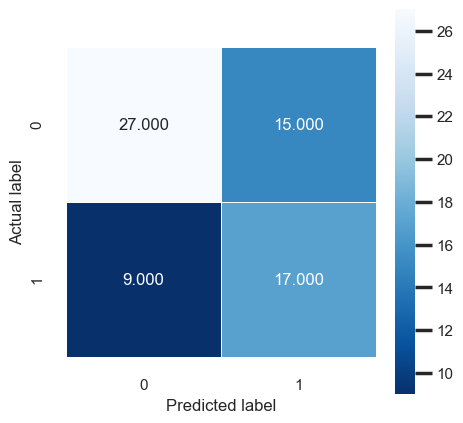

In [184]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [185]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100,1000],
    'n_jobs': [1,2,3]
}

print("First, using standardization:")
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_train)
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")
print("Minimum accuracy:", min(grid_search.cv_results_['mean_test_score']) * 100, "%")
print("Overall accuracy:", grid_search.cv_results_['mean_test_score'].mean() * 100, "%")
print("Standard Deviation is:", grid_search.cv_results_['std_test_score'])

print("\nSecond, using normalization:")
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X_train)
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")
print("Minimum accuracy:", min(grid_search.cv_results_['mean_test_score']) * 100, "%")
print("Overall accuracy:", grid_search.cv_results_['mean_test_score'].mean() * 100, "%")
print("Standard Deviation is:", grid_search.cv_results_['std_test_score'])
y_pred = grid_search.predict(X_test)

First, using standardization:
Best parameters: {'C': 0.1, 'max_iter': 100, 'n_jobs': 1}
Best accuracy score: 1.0
Minimum accuracy: 97.01219512195122 %
Overall accuracy: 99.40243902439025 %
Standard Deviation is: [0.02452099 0.02452099 0.02452099 0.02452099 0.02452099 0.02452099
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]

Second, using normalization:
Best parameters: {'C': 0.1, 'max_iter': 100, 'n_jobs': 1}
Best accuracy score: 1.0
Minimum accuracy: 96.51219512195122 %
Overall accuracy: 99.30243902439024 %
Standard Deviation is: [0.03394847 0.03394847 0.03394847 0.03394847 0.03394847 0.03394847
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.      

c:\Users\Jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



Text(0.5, 51.41666666666664, 'Predicted label')

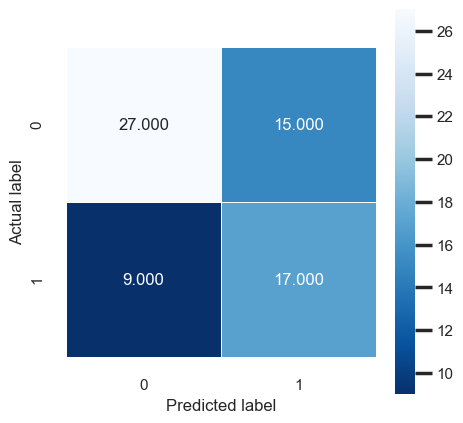

In [186]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [187]:
print("frist using standerdization")

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_train)
randomFst = RandomForestClassifier(max_depth=10, n_estimators=140,max_features=4)
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
lst_accu_stratified = []

for train_index, test_index in skf.split(x_scaled, y_train):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    randomFst.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(randomFst.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

print("second using normalization")

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X_train)
randomFst = RandomForestClassifier(max_depth=10, n_estimators=140,max_features=4)
skf = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
lst_accu_stratified = []

for train_index, test_index in skf.split(x_scaled, y_train):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    randomFst.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(randomFst.score(x_test_fold, y_test_fold))

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

frist using standerdization


KeyError: '[3, 10, 13, 14, 20, 23, 24, 28, 29, 30, 35, 41, 64, 65, 66, 71, 74, 77, 85, 91, 93, 94, 99, 101, 104, 106, 112, 113, 114, 115, 120, 127, 128, 130, 131, 134, 141, 153, 155, 163, 173, 177, 184, 186, 187, 188, 197, 200] not in index'

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 58.82%


In [ ]:
randomFst = RandomForestClassifier(max_depth=14, n_estimators=610, n_jobs = -1,max_features=4)
randomFst.fit(X_train, y_train)
randomFst.score(X_test, y_test)

0.8088235294117647

In [ ]:
logreg_random = randomFst.predict(X_test)
print(classification_report(y_test ,logreg_random))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.74      0.77      0.75        26

    accuracy                           0.81        68
   macro avg       0.80      0.80      0.80        68
weighted avg       0.81      0.81      0.81        68



roc_auc_score for randomFst:  0.8493589743589743


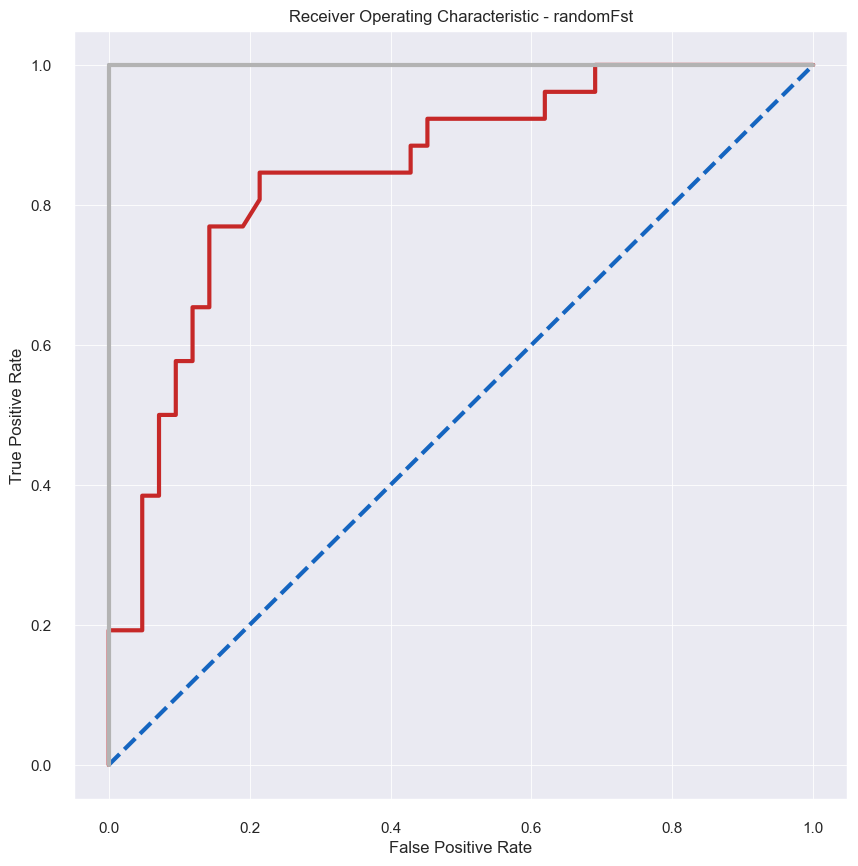

In [ ]:
y_score_randomFst = randomFst.predict_proba(X_test)[:, 1]
false_positive_rate_randomFst, true_positive_rate_randomFst, threshold_randomFst = roc_curve(y_test, y_score_randomFst)
print("roc_auc_score for randomFst: ", roc_auc_score(y_test, y_score_randomFst)) #0.5041562146475824

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - randomFst')
plt.plot(false_positive_rate_randomFst, true_positive_rate_randomFst)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        42
           1       0.47      0.73      0.58        26

    accuracy                           0.59        68
   macro avg       0.61      0.62      0.59        68
weighted avg       0.64      0.59      0.59        68



In [ ]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

0.4117647058823529
0.4117647058823529


Accuracy: 0.6176470588235294


c:\Users\Jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.62      1.00      0.76        42
           1       0.00      0.00      0.00        26

    accuracy                           0.62        68
   macro avg       0.31      0.50      0.38        68
weighted avg       0.38      0.62      0.47        68

0.38235294117647056
0.38235294117647056


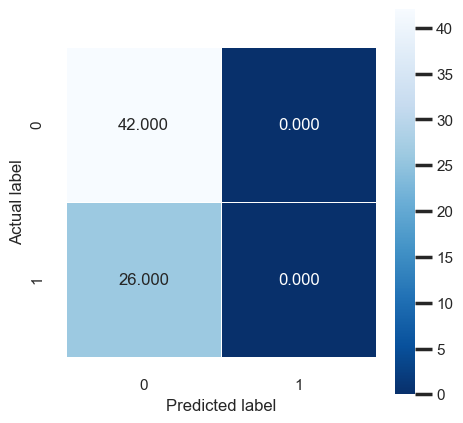

In [ ]:
#Import svm model

#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cr=classification_report(y_test, y_pred)
print(cr)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

In [ ]:
SVM = svm.SVC(kernel='sigmoid', probability=True)
SVM = SVM.fit(X_train,y_train)
SVM_pred = SVM.predict(X_test)
SVM.score(X_test, y_test)

0.6176470588235294

In [ ]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76        42
           1       0.00      0.00      0.00        26

    accuracy                           0.62        68
   macro avg       0.31      0.50      0.38        68
weighted avg       0.38      0.62      0.47        68



c:\Users\Jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



roc_auc_score for SVM:  0.6401098901098901


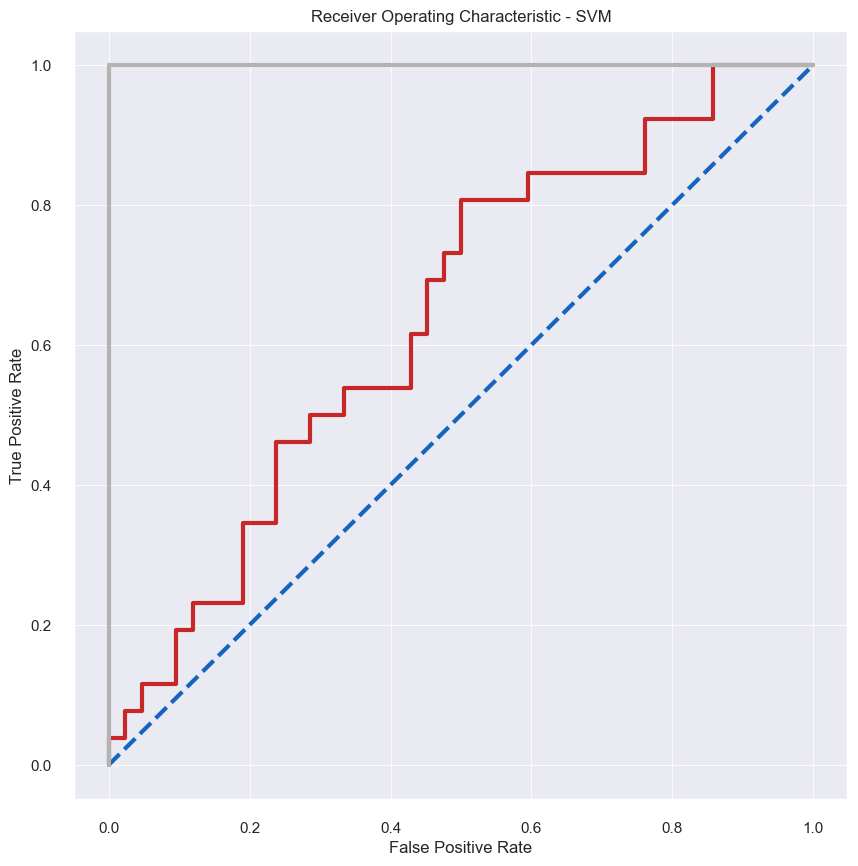

In [ ]:
y_score_SVM = SVM.predict_proba(X_test)[:, 1]
false_positive_rate_SVM, true_positive_rate_SVM, threshold_SVM = roc_curve(y_test, y_score_SVM)
print("roc_auc_score for SVM: ", roc_auc_score(y_test, y_score_SVM)) #0.5041562146475824

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate_SVM, true_positive_rate_SVM)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy: 0.7647058823529411
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.68      0.73      0.70        26

    accuracy                           0.76        68
   macro avg       0.75      0.76      0.75        68
weighted avg       0.77      0.76      0.77        68

0.23529411764705882
0.23529411764705882


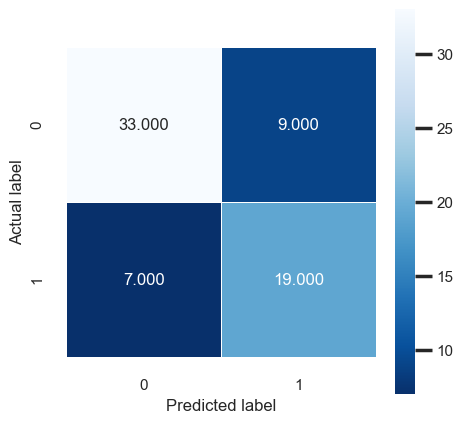

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3, random_state=41)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cr=classification_report(y_test, y_pred)
print(cr)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=41)
clf = clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.7647058823529411

In [ ]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.68      0.73      0.70        26

    accuracy                           0.76        68
   macro avg       0.75      0.76      0.75        68
weighted avg       0.77      0.76      0.77        68



roc_auc_score for Decision tree:  0.8017399267399268


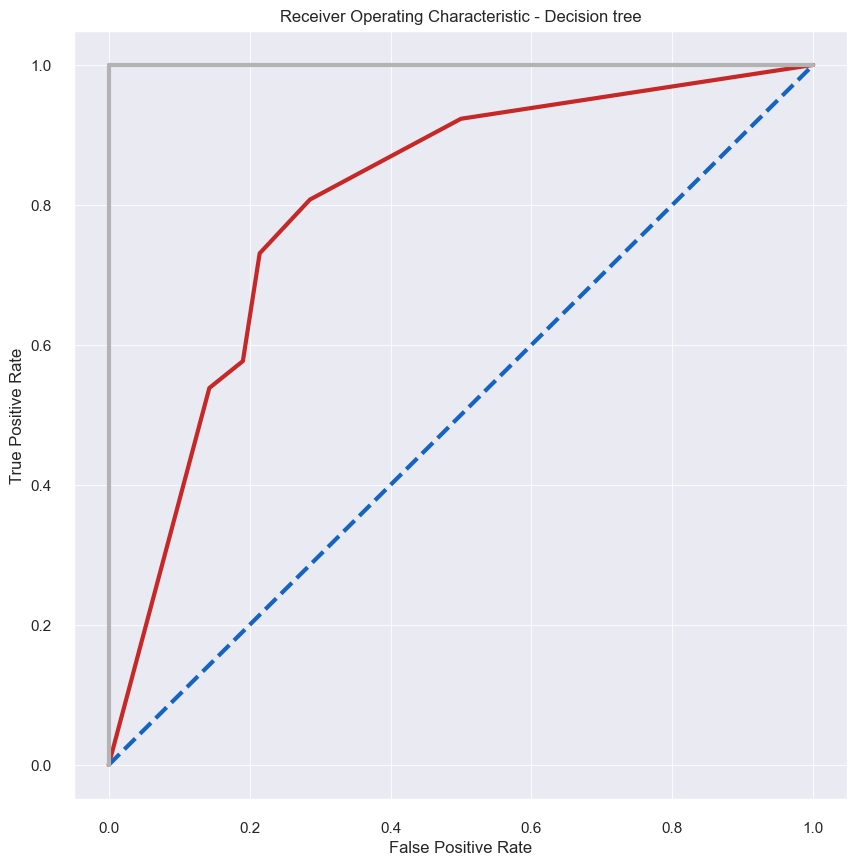

In [ ]:
y_score_clf = clf.predict_proba(X_test)[:, 1]
false_positive_rate_clf, true_positive_rate_clf, threshold_clf = roc_curve(y_test, y_score_clf)
print("roc_auc_score for Decision tree: ", roc_auc_score(y_test, y_score_clf)) #0.5041562146475824

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision tree')
plt.plot(false_positive_rate_clf, true_positive_rate_clf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.7941176470588235

In [ ]:
logreg_preds = logreg.predict(X_test)
print(classification_report(y_test, logreg_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.71      0.77      0.74        26

    accuracy                           0.79        68
   macro avg       0.78      0.79      0.79        68
weighted avg       0.80      0.79      0.80        68



roc_auc_score for Logistic Regression:  0.8415750915750916


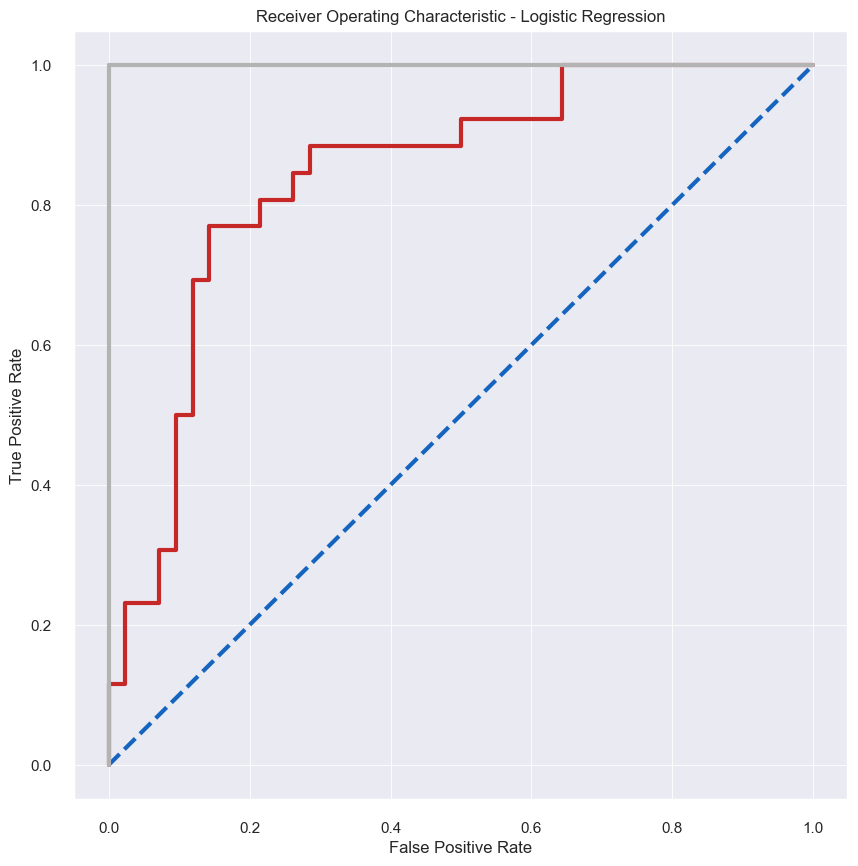

In [ ]:
y_score_logreg = logreg.predict_proba(X_test)[:, 1]
false_positive_rate_logreg, true_positive_rate_logreg, threshold_logreg = roc_curve(y_test, y_score_logreg)
print("roc_auc_score for Logistic Regression: ", roc_auc_score(y_test, y_score_logreg)) #0.5041562146475824

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate_logreg, true_positive_rate_logreg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

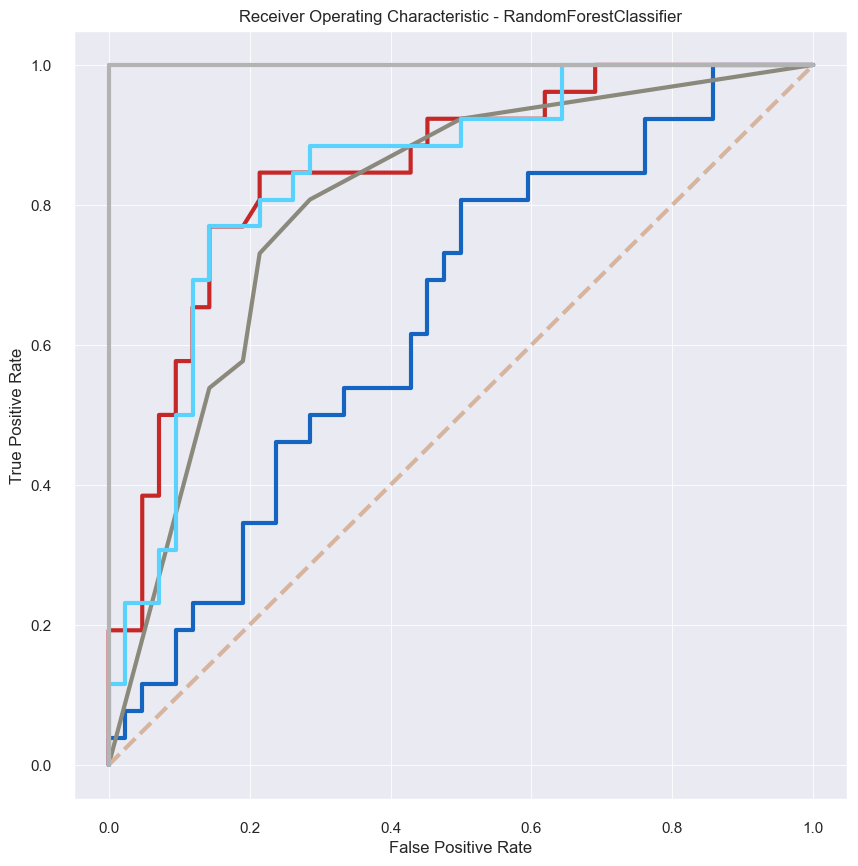

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate_randomFst, true_positive_rate_randomFst)
plt.plot(false_positive_rate_SVM, true_positive_rate_SVM)
plt.plot(false_positive_rate_clf, true_positive_rate_clf)
plt.plot(false_positive_rate_logreg, true_positive_rate_logreg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

NameError: name 'z' is not defined

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)

# Train an XGBoost regressor on the selected features
xgb_model = XGBRegressor(n_estimators=500)
xgb_model.fit(X_train_selected, y_train)

# Calculate the accuracy using cross-validation
scores = cross_val_score(xgb_model, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')
mse = -scores.mean()

print("Mean squared error:", mse)


Mean squared error: 0.17744613673658688


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Train XGBoost classifier
model = xgb.XGBClassifier(n_estimators=1000,learning_rate=0.05, n_jobs=4)
model.fit(X_train, y_train)

# Predict test set labels
y_pred = model.predict(X_test)

# Calculate accuracy using various metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 score:", f1)


Accuracy: 0.7647058823529411
AUC: 0.7582417582417582
F1 score: 0.7037037037037038


              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.68      0.73      0.70        26

    accuracy                           0.76        68
   macro avg       0.75      0.76      0.75        68
weighted avg       0.77      0.76      0.77        68

0.23529411764705882
0.23529411764705882


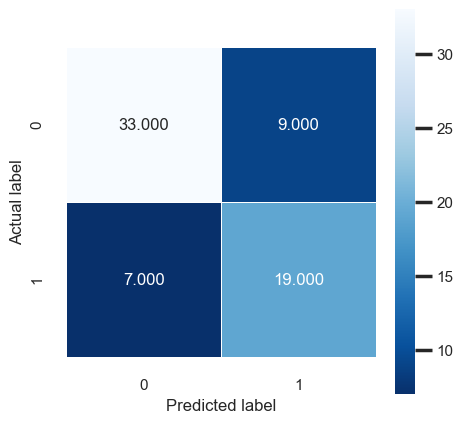

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cr=classification_report(y_test, y_pred)
print(cr)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomFst = RandomForestClassifier(max_depth=14, n_estimators=610, n_jobs = -1,max_features=4,random_state=1)
randomFst.fit(X_train, y_train)
randomFst.score(X_test, y_test)
logreg_random = randomFst.predict(X_test)
print(classification_report(y_test ,logreg_random))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.72      0.81      0.76        26

    accuracy                           0.81        68
   macro avg       0.80      0.81      0.80        68
weighted avg       0.82      0.81      0.81        68



              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.68      0.73      0.70        26

    accuracy                           0.76        68
   macro avg       0.75      0.76      0.75        68
weighted avg       0.77      0.76      0.77        68

0.23529411764705882
0.23529411764705882


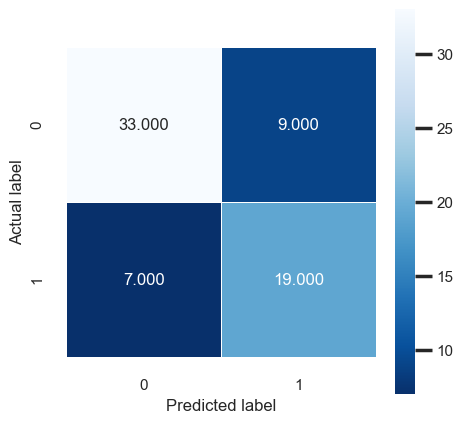

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cr=classification_report(y_test, y_pred)
print(cr)
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))

# **Conclusion**
